In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data, wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sp500 = data.DataReader('^GSPC', data_source='yahoo', start='1/1/2000', end='4/14/2014')
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3592 entries, 2000-01-03 to 2014-04-14
Data columns (total 6 columns):
Open         3592 non-null float64
High         3592 non-null float64
Low          3592 non-null float64
Close        3592 non-null float64
Adj Close    3592 non-null float64
Volume       3592 non-null int64
dtypes: float64(5), int64(1)
memory usage: 196.4 KB


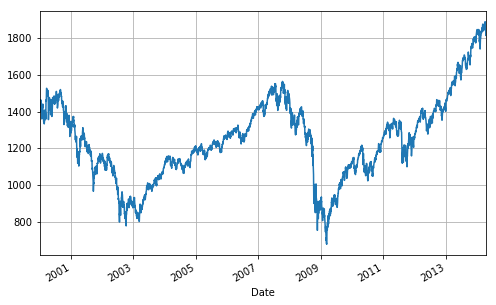

In [3]:
sp500['Close'].plot(grid=True, figsize=(8, 5))

In [19]:
# add columns with calculated 42 and 252 day rolling mean averages
sp500['42d'] = np.round(sp500['Close'].rolling(window=42,center=False).mean(), 2)
sp500['252d'] = np.round(sp500['Close'].rolling(window=252,center=False).mean(), 2)

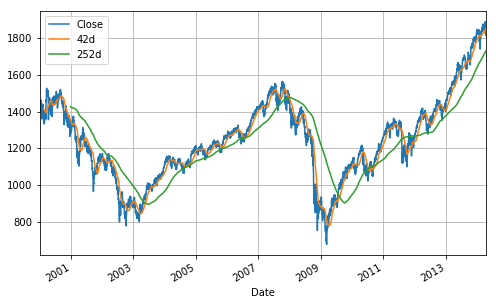

In [20]:
sp500[['Close','42d', '252d']].plot(grid=True, figsize=(8, 5))

In [21]:
sp500['42-252'] = sp500['42d'] - sp500['252d'] 

(-1.1, 1.1)

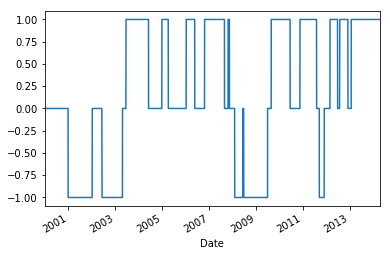

In [22]:
# Strategy is go long when 3 month avg > 1 year avg by 50 index points, go short if -50 index points, cash otherwise
SD=50
sp500['Regime'] = np.where(sp500['42-252'] > SD, 1, 0)
sp500['Regime'] = np.where(sp500['42-252'] < -SD, -1, sp500['Regime'])
sp500['Regime'].plot(lw=1.5)
plt.ylim([-1.1,	1.1])

In [23]:
# daily log returns of market index
sp500['Market'] = np.log(sp500['Close']/sp500['Close'].shift(1))
# daily log returns of strategy
sp500['Strategy'] = sp500['Regime'].shift(1)*sp500['Market']


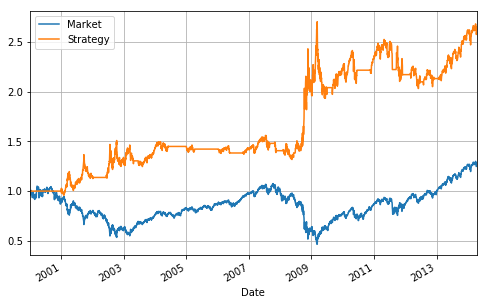

In [24]:
# log returns can be cumulatively summed and exponentiated 
sp500[['Market','Strategy']].cumsum().apply(np.exp).plot(grid=True, figsize=(8, 5))